In [47]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

In [48]:
df = pd.read_csv('vehicle.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X = X.drop(['max.length_rectangularity','scaled_variance.1','pr.axis_rectangularity'],axis = 1)

In [49]:
imp = SimpleImputer(strategy= 'mean')
X_imp = pd.DataFrame(imp.fit_transform(X),columns = X.columns)


In [50]:
scl = MinMaxScaler(feature_range=(1,2))
X_scaled = pd.DataFrame(scl.fit_transform(X_imp),columns = X.columns)

In [51]:
X_scaled.describe().round(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00,846.00
mean,1.45,1.45,1.58,1.28,1.16,1.12,1.37,1.43,1.31,1.41,1.18,1.29,1.31,1.43,1.49
std,0.18,0.24,0.22,0.15,0.09,0.09,0.22,0.22,0.17,0.20,0.10,0.22,0.22,0.21,0.25
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.30,1.27,1.42,1.16,1.11,1.09,1.23,1.20,1.19,1.25,1.11,1.09,1.12,1.27,1.31
50%,1.43,1.42,1.56,1.28,1.15,1.11,1.29,1.49,1.26,1.41,1.17,1.27,1.27,1.40,1.53
75%,1.59,1.62,1.81,1.40,1.20,1.15,1.56,1.57,1.46,1.56,1.21,1.41,1.46,1.57,1.67
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


#### Feature Improvement

Circularity

In [52]:
def col_analysis(df,col,target):
    #print(col,'\nGroupby status\n',pd.DataFrame(df.groupby('status')[col].mean()))
    fig, axes = plt.subplots(ncols = 4,figsize = (16,2.5))

    sns.distplot(df[col],ax = axes[0]);
    sns.boxplot(df[col],ax = axes[1]);
    sns.barplot(df[target],df[col],ax = axes[2]);
    sns.swarmplot(x=target,y=col,data = df,ax = axes[3]);
    fig.tight_layout();

In [53]:
df = pd.concat([X_scaled,y],axis = 1)

In [54]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,1.478261,1.576923,1.597222,1.323144,1.274725,1.150943,1.326797,1.457143,1.242105,1.471698,1.144737,1.272727,1.390244,1.366667,1.533333,van
1,1.391304,1.307692,1.611111,1.161572,1.109890,1.132075,1.241830,1.542857,1.210526,1.308176,1.171053,1.409091,1.341463,1.433333,1.600000,van
2,1.673913,1.653846,1.916667,1.458515,1.208791,1.150943,1.620915,1.171429,1.489474,1.698113,1.184211,1.636364,1.219512,1.400000,1.500000,car
3,1.434783,1.307692,1.583333,1.240175,1.175824,1.132075,1.209150,1.571429,1.157895,1.113208,1.052632,1.272727,1.243902,1.766667,1.866667,van
4,1.260870,1.423077,1.416667,1.441048,1.615385,1.943396,1.241830,1.542857,1.584211,1.496855,1.894737,1.409091,1.268293,1.133333,1.066667,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,1.434783,1.230769,1.652778,1.344978,1.186813,1.113208,1.372549,1.400000,1.368421,1.251572,1.171053,1.318182,1.609756,1.400000,1.466667,car
842,1.347826,1.500000,1.611111,1.257642,1.208791,1.169811,1.307190,1.485714,1.226316,1.421384,1.171053,1.045455,1.487805,1.333333,1.533333,van
843,1.717391,1.807692,1.847222,1.515284,1.219780,1.188679,1.718954,1.114286,1.515789,1.572327,1.144737,1.136364,1.097561,1.366667,1.666667,car
844,1.282609,1.115385,1.527778,1.183406,1.120879,1.094340,1.150327,1.685714,1.131579,1.245283,1.092105,1.000000,1.609756,1.466667,1.466667,car


In [55]:
X_log = np.log10(X_scaled)
df = pd.concat([X_log,y],axis = 1)

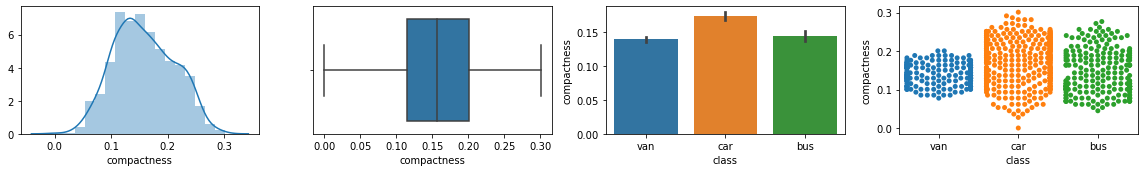

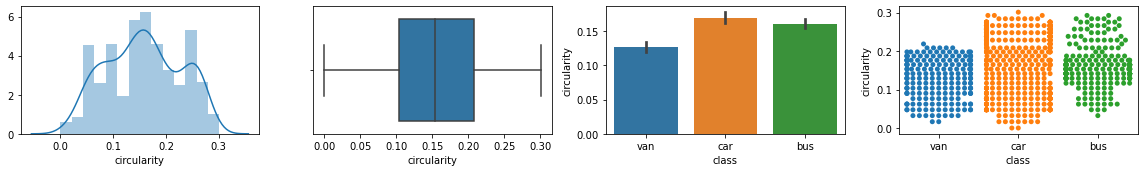

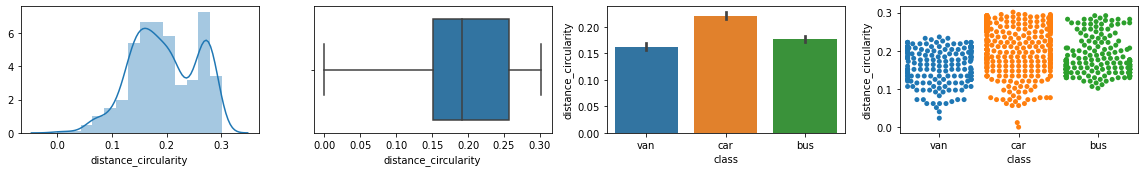

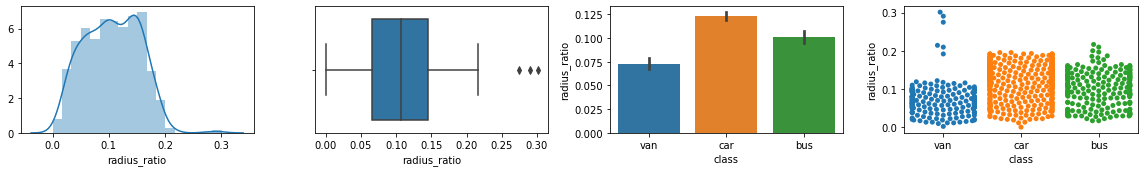

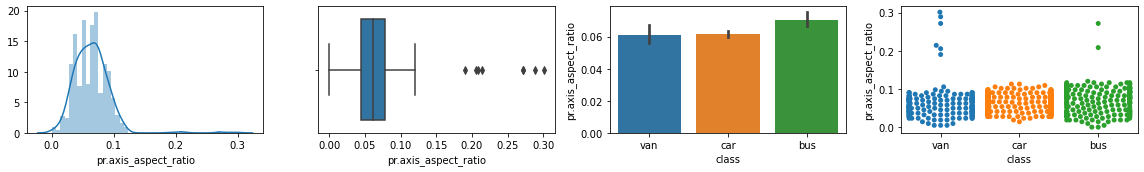

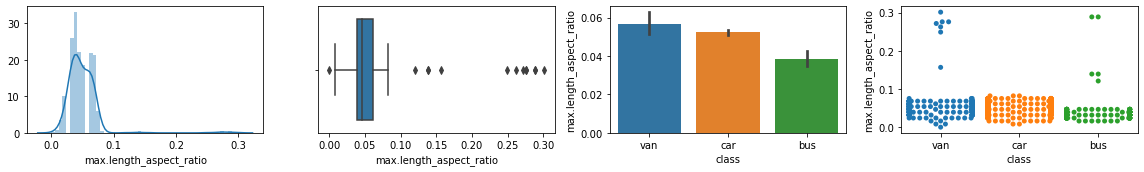

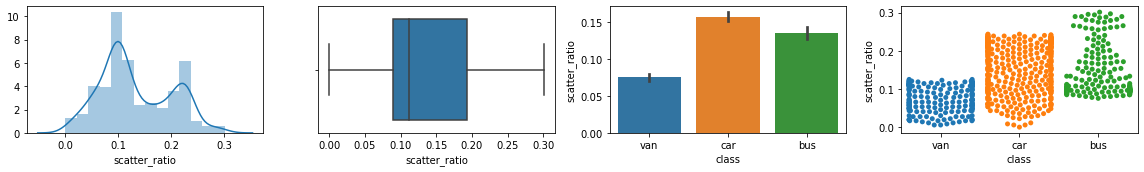

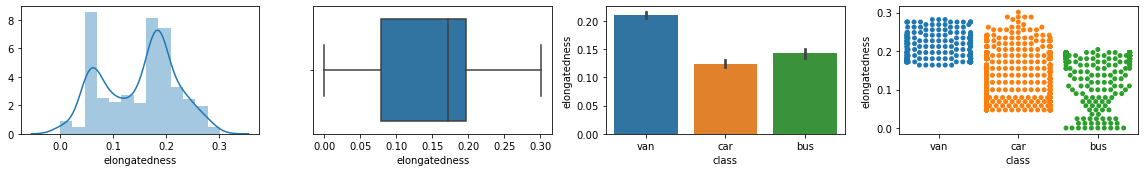

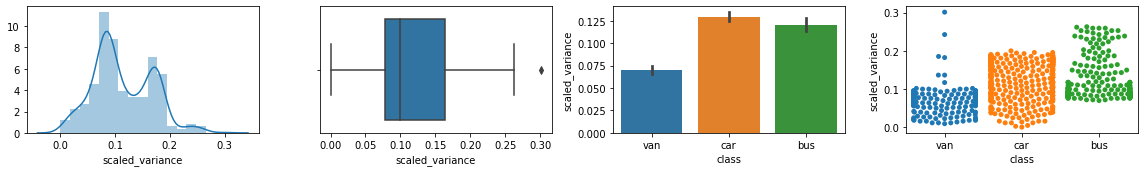

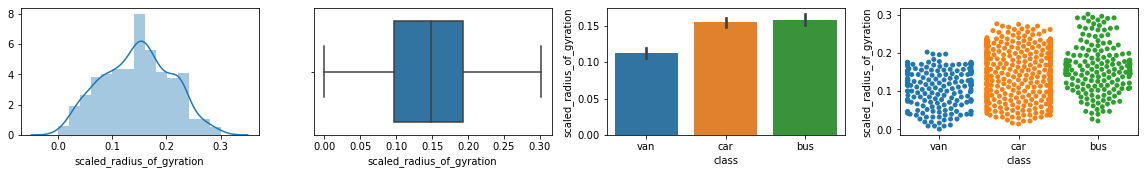

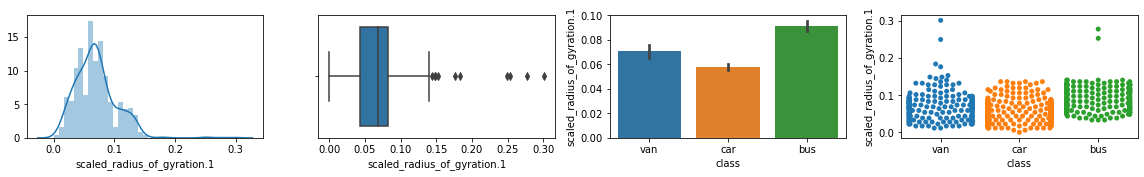

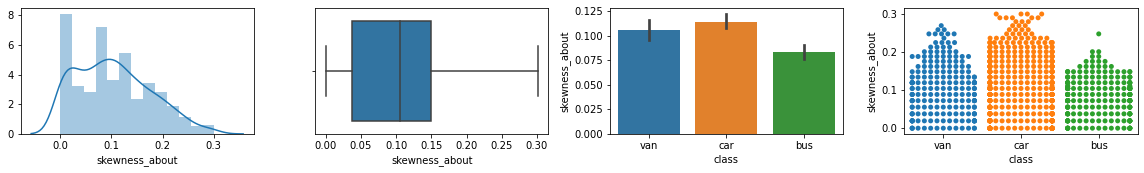

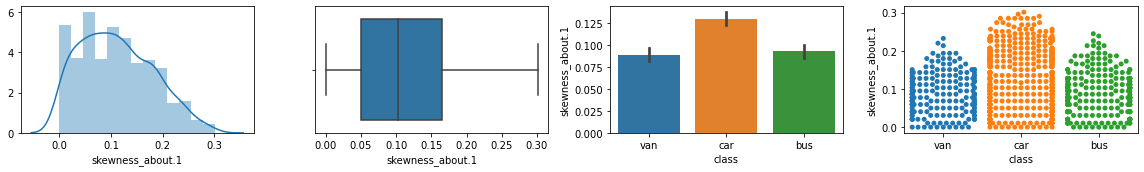

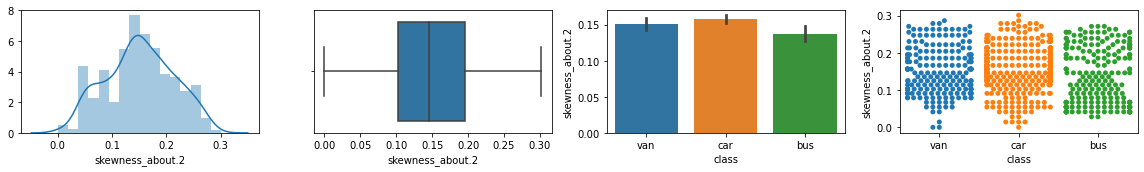

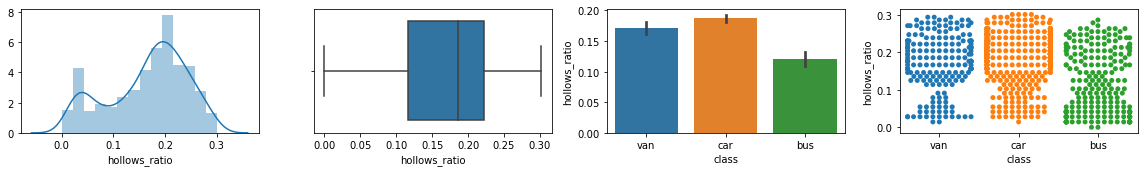

In [57]:
for col in X_scaled.columns:
    col_analysis(df,col,'class')

In [58]:
from sklearn.preprocessing import LabelEncoder
df['lbl_class'] = LabelEncoder().fit_transform(df['class'])

In [59]:
def highlight_range(s):
    threshold = 0.95
    is_max = s == s.max()
    val = s > threshold
    return ['background-color: green' if v else '' for v in val]

print("\nHighlight the maximum value in each column:")
df.corr().round(2).style.apply(highlight_range)


Highlight the maximum value in each column:


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,lbl_class
compactness,1.000000,0.660000,0.770000,0.700000,0.120000,0.200000,0.790000,-0.800000,0.750000,0.550000,-0.270000,0.220000,0.150000,0.360000,0.400000,-0.020000
circularity,0.660000,1.000000,0.780000,0.620000,0.180000,0.310000,0.830000,-0.820000,0.790000,0.930000,0.070000,0.150000,-0.030000,-0.070000,0.070000,-0.160000
distance_circularity,0.770000,0.780000,1.000000,0.780000,0.190000,0.340000,0.900000,-0.910000,0.870000,0.690000,-0.240000,0.100000,0.250000,0.210000,0.370000,-0.070000
radius_ratio,0.700000,0.620000,0.780000,1.000000,0.670000,0.450000,0.760000,-0.800000,0.810000,0.530000,-0.250000,0.040000,0.170000,0.440000,0.520000,-0.190000
pr.axis_aspect_ratio,0.120000,0.180000,0.190000,0.670000,1.000000,0.570000,0.140000,-0.190000,0.280000,0.140000,0.040000,-0.060000,-0.030000,0.300000,0.330000,-0.110000
max.length_aspect_ratio,0.200000,0.310000,0.340000,0.450000,0.570000,1.000000,0.230000,-0.220000,0.350000,0.240000,0.180000,0.020000,0.060000,0.010000,0.200000,0.240000
scatter_ratio,0.790000,0.830000,0.900000,0.760000,0.140000,0.230000,1.000000,-0.990000,0.950000,0.780000,-0.040000,0.070000,0.210000,0.060000,0.160000,-0.300000
elongatedness,-0.800000,-0.820000,-0.910000,-0.800000,-0.190000,-0.220000,-0.990000,1.000000,-0.960000,-0.760000,0.080000,-0.060000,-0.190000,-0.130000,-0.210000,0.330000
scaled_variance,0.750000,0.790000,0.870000,0.810000,0.280000,0.350000,0.950000,-0.960000,1.000000,0.760000,0.080000,0.030000,0.190000,0.070000,0.130000,-0.320000
scaled_radius_of_gyration,0.550000,0.930000,0.690000,0.530000,0.140000,0.240000,0.780000,-0.760000,0.760000,1.000000,0.210000,0.180000,-0.070000,-0.200000,-0.100000,-0.250000


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.3, random_state = 1)

In [115]:
df = pd.read_csv('vehicle.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X = X.drop(['max.length_rectangularity','scaled_variance.1','pr.axis_rectangularity'],axis = 1)

imp = SimpleImputer(strategy= 'median')
X_imp = pd.DataFrame(imp.fit_transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.3, random_state = 1)

In [116]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=6)
pca3.fit(X_imp)
#print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_imp)

[0.76926244 0.11868523 0.04711998 0.02696442 0.01262169 0.00641098]


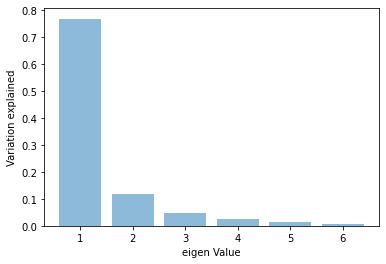

In [117]:
plt.bar(list(range(1,7)),pca3.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

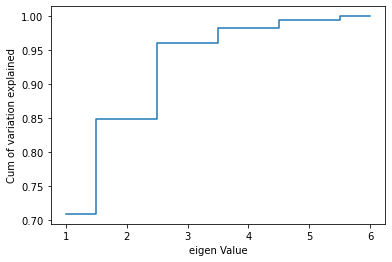

In [37]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [121]:
X_imp

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,176.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,170.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,223.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,160.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,241.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,200.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,173.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,228.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,155.0,148.0,66.0,0.0,25.0,190.0,195.0


In [125]:
df = pd.read_csv('vehicle.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
#X = X.drop(['max.length_rectangularity','scaled_variance.1','pr.axis_rectangularity'],axis = 1)

imp = SimpleImputer(strategy= 'median')
X_imp = pd.DataFrame(imp.fit_transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.3, random_state = 1)

In [126]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.3, random_state = 1)
lg = LogisticRegression()
lg.fit(X_train, y_train)
print("Train Results {:.4f}".format(lg.score(X_train,y_train)))
print("Test Results {:.4f}".format(lg.score(X_test,y_test)))

Train Results 0.8970
Test Results 0.9173


In [119]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size = 0.3, random_state = 1)
lg = LogisticRegression()
lg.fit(X_train, y_train)
print("Train Results {:.4f}".format(lg.score(X_train,y_train)))
print("Test Results {:.4f}".format(lg.score(X_test,y_test)))

Train Results 0.7027
Test Results 0.6890
